# Qiskit

Instalamos Qiskit

In [1]:
#!pip install qiskit

## Importamos todo de qiskit

In [2]:
from qiskit import *

## Comprobamos la versión

In [40]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [4]:
for element, version in qiskit.__qiskit_version__.items():
    print(element,version)

qiskit-terra 0.18.3
qiskit-aer 0.9.1
qiskit-ignis 0.6.0
qiskit-ibmq-provider 0.18.1
qiskit-aqua 0.9.5
qiskit 0.32.1
qiskit-nature None
qiskit-finance None
qiskit-optimization None
qiskit-machine-learning None


In [5]:
for version in qiskit.__qiskit_version__.items():
    print(version)

('qiskit-terra', '0.18.3')
('qiskit-aer', '0.9.1')
('qiskit-ignis', '0.6.0')
('qiskit-ibmq-provider', '0.18.1')
('qiskit-aqua', '0.9.5')
('qiskit', '0.32.1')
('qiskit-nature', None)
('qiskit-finance', None)
('qiskit-optimization', None)
('qiskit-machine-learning', None)


## Creamos el circuito

La mayoría de los circuitos serán una combinación de registros clásicos y cuánticos

**Los registros cuánticos** son usados para:

* realizar operaciones mecánicas cuánticas en qubits

**Los registros clásicos:**

* Serán usados para realizar operaciones clásicas de las medidas obtenidas

### Registro cuántico de 2 qubits

In [6]:
qr = QuantumRegister(2)
qr

QuantumRegister(2, 'q0')

### Registro clásico de 2 bits

In [7]:
cr = ClassicalRegister(2)

### Construimos un circuito con estos dos

In [8]:
circuit = QuantumCircuit(qr,cr)
circuit

## Dibujamos el circuito

In [9]:
!pip install pylatexenc
%matplotlib inline

In [10]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

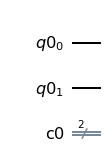

In [11]:
circuit.draw(output='mpl')

### Vemos dos bits cuánticos y 2 bits clásicos

### Bits cuánticos (q0_0) y (q0_1)

Con el objetivo de crear "entanglement" (entrelazamiento cuántico)
Lo primero es aplicar la puerta Hadamard en el primer qubit (q0_0)
con ello logramos la "superposición)"
al aplicar el operador H produce que un qubit pase de un estado básico, |0> o |1>, a un estado de superposición equiparable de ambos estados

In [12]:
circuit.h(qr[0])

In [13]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

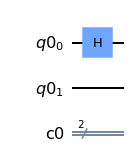

In [14]:
#mejor visualizad
circuit.draw(output='mpl')

Aparece la puerta Hadamard (Hadamard gate) tal y como se ve en azul

Ahora la puerta cx, que es la "controlled-x gate" y la puerta hace un not en qubit target si el qubit de control está en estado 1
por defecto todos los qubits son inicializados a 0

En la siguiente ecuación
el de control (qr[0]),
el target (qr[1])


In [15]:
circuit.cx(qr[0],qr[1])

Lo dibujamos

In [16]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

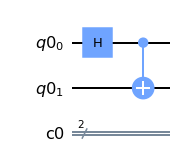

In [17]:
circuit.draw(output='mpl')

## Medición de los bits cuánticos

Un experimento real termina por medir cada qubit.
Sin medición no podemos obtener información acerca del estado

In [18]:
circuit.measure(qr,cr)

In [19]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

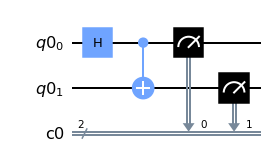

In [20]:
circuit.draw(output='mpl')

# Ejecutar el ejercicio en nuestro ordenador

In [21]:
backend_simulator = Aer.get_backend('qasm_simulator')
backend_simulator

QasmSimulator('qasm_simulator')

### Opción 1

In [22]:
job_simulator = execute(circuit, backend=backend_simulator)
job_simulator

### Opción 2

In [23]:
execute(circuit,backend=backend_simulator, shots=1024)

In [24]:
result = job_simulator.result()
result

Result(backend_name='qasm_simulator', backend_version='0.9.1', qobj_id='a9b0edfb-05a6-45d1-a2ec-14f009de3561', job_id='622337ce-e770-4385-a11b-e4caf08a596d', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 529, '0x3': 495}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-9', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=621900444, metadata={'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': False}}, time_taken=0.0032431)], date=2021-11-29T19:59:56.021340, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backen

In [25]:
result.status

'COMPLETED'

### plot_histogram

In [26]:
from qiskit.tools.visualization import plot_histogram

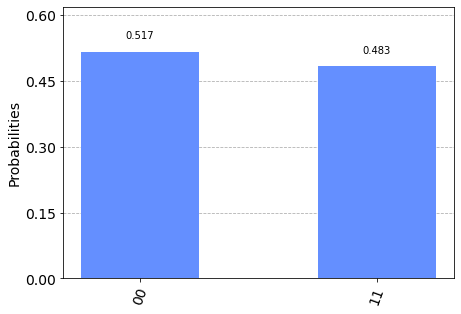

In [27]:
plot_histogram(result.get_counts(circuit))

# Ejecución en quantum computer de IBM

In [28]:
from qiskit import IBMQ

Aqui pondremos el token de nuestra cuenta

In [29]:
#IBMQ.save_account('')

In [30]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [31]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [32]:
provider = IBMQ.get_provider('ibm-q')
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [33]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

Elejimos por ejemplo 
<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [34]:
qcomp = provider.get_backend('ibmq_manila')
qcomp

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [35]:
job = execute(circuit, backend=qcomp)
job

In [36]:
from qiskit.tools.monitor import job_monitor

In [37]:
job_monitor(job)

Job Status: job has successfully run


Una empezará poniendose en cola y cada poco se actualiza
poniendo:

    Job Status: job is queued (12)
    Job Status: job is queued (11)
    Job Status: job is queued (10)
    ....................

Cuando finaliza pone:
    
    Job Status: job has successfuly run
        
Una vez que se ha completado continuamos

In [38]:
result = job.result()
result

Result(backend_name='ibmq_manila', backend_version='1.0.20', qobj_id='98c1ef48-98cb-4e8c-a97b-e965e591e619', job_id='61a523313270ebc8d7c2ebe9', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 460, '0x1': 39, '0x2': 24, '0x3': 501}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-9', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2021-11-29 20:52:35+01:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_manila', backend_version='1.0.20'), execution_id='e27ffd4a-514d-11ec-b033-bc97e15b08d0', time_taken=5.341359615325928, error=None, client_version={'qiskit': '0.32.1'})

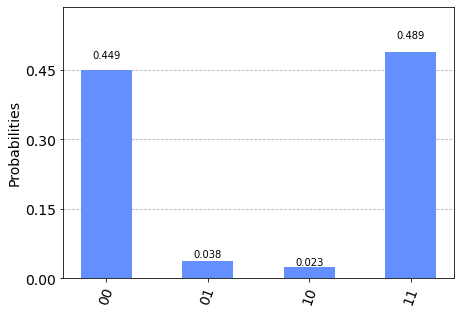

In [39]:
plot_histogram(result.get_counts(circuit))

Podemos observar en la gráfica que hay interferencias por eso se muestra 01 y 10 con valores